# Assessment


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive')

### Task 2

In [3]:
import pandas as pd
df = pd.read_csv('insurance_data.csv', sep=';')
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [177]:
# Check for missing values in (%)
for i in df.columns:
    if df[i].isnull().sum():
        print(str(i) + ": " + str(df[i].isnull().sum()/len(df)*100))

gender: 2.0545454545454542
is45OrOlder: 1.7454545454545456
healthRiders: 36.03636363636364
premiumFrequency: 2.0727272727272728


In [ ]:
# Check the unique values in columns to replace dirty inputs
for i in df.columns:
    print(i + ":")
    print(df[i].unique())

In [179]:
# Check current data types of each columns
for i in df.columns:
    print(i + ": " + str(df[i].dtypes))

insuree#: int64
gender: object
is45OrOlder: float64
isMarried: object
hasKids: object
insuredMonths: int64
termLifeInsurance: object
multipleTermLifePolicies: object
healthInsurance: object
healthRiders: object
premiumFrequency: float64
eStatements: object
monthlyPremium: object
totalPremium: object
renewal: object


In [180]:
# Converting data types where appropriate
df['is45OrOlder'] = df['is45OrOlder'].astype('bool')

df['isMarried'] = df['isMarried'].apply(lambda x: 1 if x=="Yes" else 0)
df['isMarried'] = df['isMarried'].astype('bool')

df['hasKids'] = df['hasKids'].apply(lambda x: 1 if x=="Yes" else 0)
df['hasKids'] = df['hasKids'].astype('bool')

df['termLifeInsurance'] = df['termLifeInsurance'].apply(lambda x: 1 if x=="Yes" else 0)
df['termLifeInsurance'] = df['termLifeInsurance'].astype('bool')

df['multipleTermLifePolicies'] = np.where(df['multipleTermLifePolicies']=='no term life policy taken', "No", df['multipleTermLifePolicies'])
df['multipleTermLifePolicies'] = np.where(df['multipleTermLifePolicies']=='term life policy not taken', "No", df['multipleTermLifePolicies'])
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].apply(lambda x: 1 if x=="Yes" else 0)
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].astype('bool')

df['healthInsurance'] = df['healthInsurance'].apply(lambda x: 0 if x=="No" else 1)
df['healthInsurance'] = df['healthInsurance'].astype('bool')

df['premiumFrequency'].fillna(0, inplace = True)
df['premiumFrequency'] = df['premiumFrequency'].astype('Int64')

df['eStatements'] = df['eStatements'].apply(lambda x: 1 if x=="Yes" else 0)
df['eStatements'] = df['eStatements'].astype('bool')

# Replace , with . to denote decimal points in amounts. Could not find better explanation from data source.
df['monthlyPremium'] = df['monthlyPremium'].str.replace(',','.')
df['monthlyPremium'] = df['monthlyPremium'].astype('float64')

# Replace , with . to denote decimal points in amounts. Could not find better explanation from data source.
df['totalPremium'] = df['totalPremium'].str.replace(',','.')
df['totalPremium'] = df['totalPremium'].str.replace(',','.')
df['totalPremium'] = np.where(df['totalPremium']==" ", 0, df['totalPremium'])
df['totalPremium'] = df['totalPremium'].astype('float64')

df['renewal'] = df['renewal'].apply(lambda x: 1 if x=="Y" else 0)
df['renewal'] = df['renewal'].astype('bool')

# Convert to list of integers
df['healthRiders'] = df['healthRiders'].str.split(",")
df['healthRiders'] = df['healthRiders'].apply(lambda x: [int(i) for i in x] if type(x) != float else x)

In [181]:
# Check the types matches description
for i in df.columns:
    print(i + ": " + str(df[i].dtypes))

insuree#: int64
gender: object
is45OrOlder: bool
isMarried: bool
hasKids: bool
insuredMonths: int64
termLifeInsurance: bool
multipleTermLifePolicies: bool
healthInsurance: bool
healthRiders: object
premiumFrequency: Int64
eStatements: bool
monthlyPremium: float64
totalPremium: float64
renewal: bool


In [142]:
# !apt install mongodb >log
# !service mongodb start
import pymongo
from pymongo import MongoClient

# Set up the connection
client = MongoClient()
db = client["insurance_data"]
my_collection = db["insurance_data"]

# Set up nested dictionary
data_dict = df.to_dict("records")
for i in range(len(data_dict)):
    data_dict[i]["termLifeInsurance"] = {"hasPolicy": data_dict[i]["termLifeInsurance"], "hasMultiplePolcies": data_dict[i]["multipleTermLifePolicies"]}
    data_dict[i]["healthInsurance"] = {"hasPolicy": data_dict[i]["healthInsurance"], "riders": data_dict[i]["healthRiders"]}
    del data_dict[i]['multipleTermLifePolicies']
    del data_dict[i]['healthRiders']

# Push to mongodb
my_collection.insert_many(data_dict)

### Task 1

In [69]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [70]:
# ; is used as delimiter insetad of usual comma
df = pd.read_csv('insurance_data.csv', sep=';')
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


Data Preprocessing

In [71]:
# Check for missing values in (%)
for i in df.columns:
    if df[i].isnull().sum():
        print(str(i) + ": " + str(df[i].isnull().sum()/len(df)*100))

gender: 2.0545454545454542
is45OrOlder: 1.7454545454545456
healthRiders: 36.03636363636364
premiumFrequency: 2.0727272727272728


In [72]:
# Fill in missing values

# With more gender pronouns today, people may not identify to M or F, hence we label them as Others
df['gender'].fillna("Others", inplace = True)
# Percentages of missing values are low, and 45 or older is proportionally much smaller than 45 or younger, we follow the majority
df['is45OrOlder'].fillna(df['is45OrOlder'].mode()[0], inplace = True)
# Percentages of missing values are low, we assume most people will follow the most popular premium frequency plan
df['premiumFrequency'].fillna(df['premiumFrequency'].mode()[0], inplace = True)

In [73]:
# Check the unique values in non integer or float columns to replace dirty inputs
for i in df.columns:
    if df[i].dtypes == "bool" or df[i].dtypes == "object":
        print(i + ":")
        print(df[i].unique())

gender:
['F' 'M' 'Others']
isMarried:
['Yes' 'No']
hasKids:
['Yes' 'No']
termLifeInsurance:
['Yes' 'No']
multipleTermLifePolicies:
['No' 'Yes' 'no term life policy taken' 'term life policy not taken']
healthInsurance:
['No' 'Class A' 'Class B']
healthRiders:
[nan '3' '3,4' '2' '1' '2,3,4' '1,2,3,4' '2,4' '1,2,4' '1,4' '1,2' '1,2,3'
 '1,3,4' '1,3' '4' '2,3']
eStatements:
['Yes' 'No']
monthlyPremium:
['19,65' '84,65' '19,4' ... '112,25' '83,6' '73,5']
totalPremium:
['451,55' '3541,35' '1496,45' ... '4557,5' '1090,6' '393,15']
renewal:
['Y' 'N']


In [74]:
# Converting data types where appropriate
df['is45OrOlder'] = df['is45OrOlder'].astype('bool')

df['isMarried'] = df['isMarried'].apply(lambda x: 1 if x=="Yes" else 0)
df['isMarried'] = df['isMarried'].astype('bool')

df['hasKids'] = df['hasKids'].apply(lambda x: 1 if x=="Yes" else 0)
df['hasKids'] = df['hasKids'].astype('bool')

df['termLifeInsurance'] = df['termLifeInsurance'].apply(lambda x: 1 if x=="Yes" else 0)
df['termLifeInsurance'] = df['termLifeInsurance'].astype('bool')

df['multipleTermLifePolicies'] = np.where(df['multipleTermLifePolicies']=='no term life policy taken', "No", df['multipleTermLifePolicies'])
df['multipleTermLifePolicies'] = np.where(df['multipleTermLifePolicies']=='term life policy not taken', "No", df['multipleTermLifePolicies'])
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].apply(lambda x: 1 if x=="Yes" else 0)
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].astype('bool')

df['healthInsurance'] = df['healthInsurance'].apply(lambda x: 0 if x=="No" else 1)
df['healthInsurance'] = df['healthInsurance'].astype('bool')

# Converted to object (eventually be label encoded as unique int values represents monthly, quaterlly, yearly etc)
df['premiumFrequency'] = df['premiumFrequency'].astype('object')

df['eStatements'] = df['eStatements'].apply(lambda x: 1 if x=="Yes" else 0)
df['eStatements'] = df['eStatements'].astype('bool')

# Replace , with . to denote decimal points in amounts. Could not find better explanation from data source.
df['monthlyPremium'] = df['monthlyPremium'].str.replace(',','.')
df['monthlyPremium'] = df['monthlyPremium'].astype('float64')

# Replace , with . to denote decimal points in amounts. Could not find better explanation from data source.
df['totalPremium'] = df['totalPremium'].str.replace(',','.')
df['totalPremium'] = df['totalPremium'].str.replace(',','.')
df['totalPremium'] = np.where(df['totalPremium']==" ", 0, df['totalPremium'])
df['totalPremium'] = df['totalPremium'].astype('float64')

df['renewal'] = df['renewal'].apply(lambda x: 1 if x=="Y" else 0)
df['renewal'] = df['renewal'].astype('bool')

# Split the list of health riders to dummy columns with 1 representing insuree signing up for rider N, 0 otherwise, where N is 1 to 4.
df['healthRiders'] = df['healthRiders'].str.split(",")
df = df.drop('healthRiders', 1).join(df['healthRiders'].str.join('|').str.get_dummies().astype("int64"))
df = df.rename(columns={'1': 'rider1', '2': 'rider2', '3': 'rider3', '4': 'rider4', 'None': 'riderNone'})
df['rider1'] = df['rider1'].astype('bool')
df['rider2'] = df['rider2'].astype('bool')
df['rider3'] = df['rider3'].astype('bool')
df['rider4'] = df['rider4'].astype('bool')

# Dropped as it is not needed
df.drop(columns='insuree#', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


<Figure size 432x288 with 0 Axes>

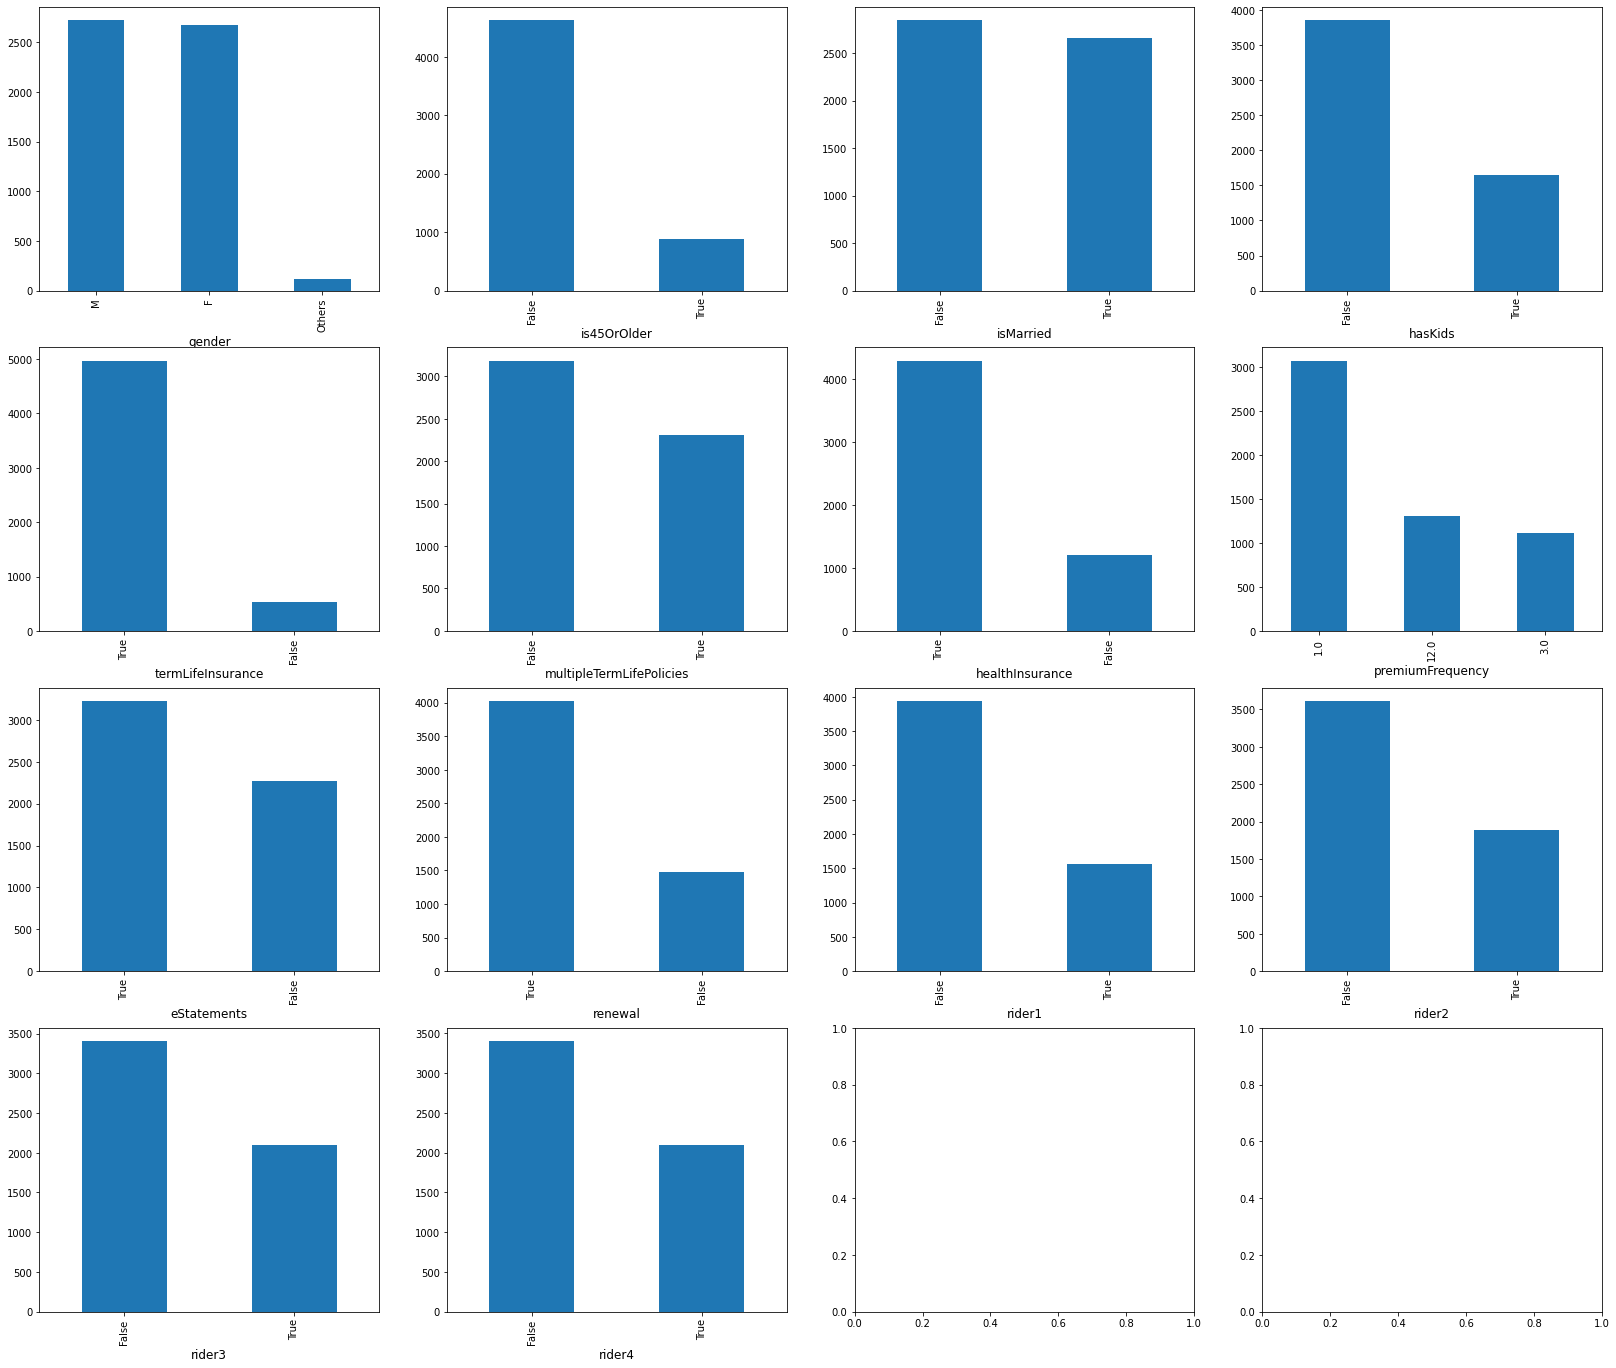

In [75]:
# Rough distribution of categorical variables
plt.figure()
fig, ax = plt.subplots(4,4,figsize=(28,24))

i = 0
for feature in df.columns.values:
    if df[feature].dtype == "object" or df[feature].dtype == "bool":
        i += 1
        plt.subplot(4,4,i)
        df[feature].value_counts(dropna=False).plot(kind="bar")
        plt.xlabel(feature, fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

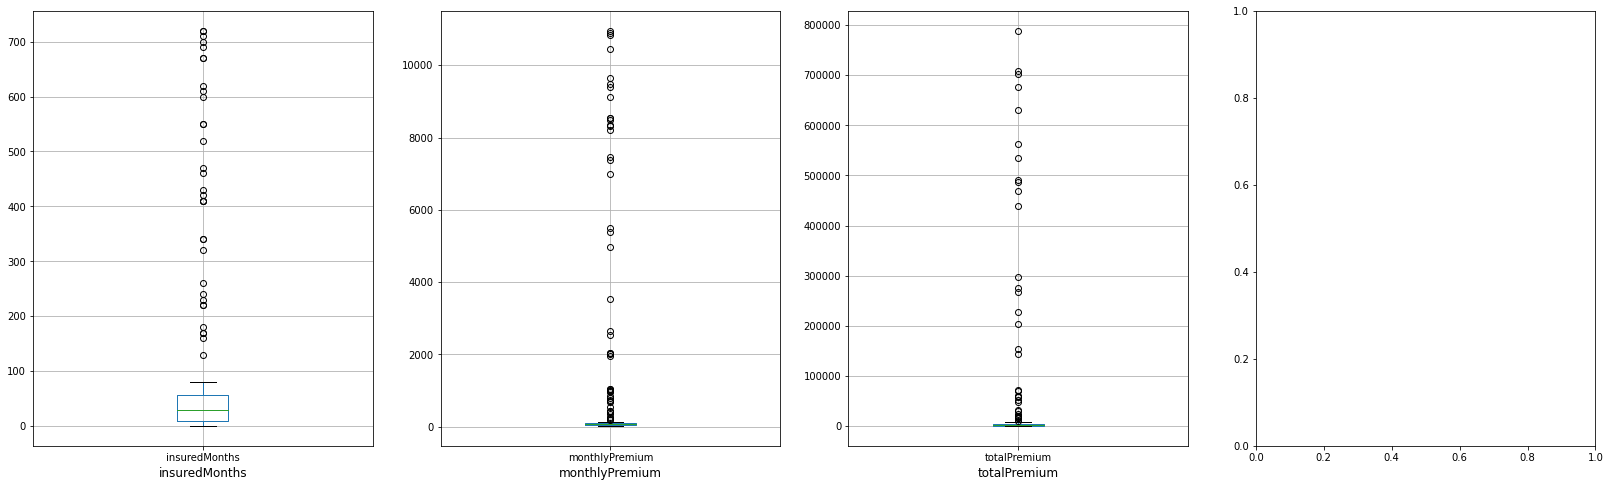

In [76]:
# Rough distribution of numerical variables and check for outliers
plt.figure()
fig, ax = plt.subplots(1,4,figsize=(28,8))

i = 0
for feature in df.columns.values:
    if df[feature].dtype != "object" and df[feature].dtype != "bool":
        i += 1
        plt.subplot(1,4,i)
        df.boxplot(feature)
        plt.xlabel(feature, fontsize=12)
plt.show()

In [77]:
# Label encode the categorical variables, standardize all the integers
for i in df.columns:
    if df[feature].dtype == "object" or df[feature].dtype == "bool":
      le = preprocessing.LabelEncoder()
      le.fit(df[i])
      df[i] = le.transform(df[i])

In [78]:
# Removal of outliers (note all monthlyPremium outliers corresponds to totalPremium outliers)
# Rationale being the amounts are significantly larger than the 25% to 75% values, amounts does not seem possible as well.
# We will build 2 models one with outlier and another without.
# Outliers in insuredMonths left untouched as they seemed reasonable.
cols = ['monthlyPremium']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
new_df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [81]:
new_df.head()

,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,rider1,rider2,rider3,rider4
0,0,0,1,1,23,1,0,0,2,1,22,1209,1,0,0,0,0
1,0,1,0,0,42,1,1,1,0,1,918,3695,0,0,0,1,0
2,0,0,1,0,72,1,0,0,2,0,17,2554,1,0,0,0,0
3,0,0,1,1,13,1,0,0,2,0,20,856,1,0,0,0,0
4,0,0,0,0,37,1,1,1,0,0,1208,3696,1,0,0,1,1


In [80]:
# Export to R Studio for modelling
new_df.to_csv("./no_outliers.csv")
df.to_csv("./with_outliers.csv")

Finding Associations

Note: Data Modelling (in R)